# Neptune-Keras Integration

## What will you get with this integration
------------------------------------------------------
In this tutorial, you'll learn how to integrate Neptune into your Keras application, and at the end you'll be able to efficiently track and monitor model trainings, metrics, images and even datasets. 


Video [1min screencast]

## What does the library we integrate with do (1-2 sentences).

[Keras](https://keras.io/) is a high level interactive API that can be used to prototype, build and train neural network. Keras acts as an interface for the TensorFlow library, and in the latest version of Tensorflow, Keras was officially integrated under the name [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras). The original Keras os still available, but in this tutorial, you'll be using the Tensorflow version of Keras (TF Keras). Don't worry, the API is totally the same. For more explanation on TF Keras, check out this [link](https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/). 

At the end of this tutorial you will learn:

- How to integrate Neptune with Keras to effectively track metrics and model training.
- How to easily reproduce experiments and aid collaboration in your project.

__Note:__ This integration works with library==tf.keras v0.24.1 and neptune-contrib v0.24.1

Links:

|source code| |[open in colab](https://colab.research.google.com/drive/1ITLOePfJh9rNR1jis5gBES2InDo_8Iz4?usp=sharing)| |[public neptune project](https://ui.neptune.ai/risingodegua/spam-classifier/experiments?viewId=standard-view)|

## Quickstart
-------------

### Introduction

Neptune is a lightweight experiment management tool that helps you keep track of your machine learning experiments. With Neptune, you can:

- [Monitor ML runs live](https://docs.neptune.ai/getting-started/quick-starts/how-to-monitor-live.html#use-cases-monitor-runs-live)

- [Organize ML experimentation](https://docs.neptune.ai/getting-started/quick-starts/how-to-organize-experiments.html#use-cases-organize-ml-experiments)

- [Compare and debug ML experiments and models](https://docs.neptune.ai/getting-started/quick-starts/how-to-compare-experiments.html#use-cases-compare-and-debug-experiments)

- [Share results of experiments with your team](https://docs.neptune.ai/getting-started/quick-starts/how-to-share-results.html#use-cases-share-results-with-team)

- [Clean up your Jupyter workflow without git](https://docs.neptune.ai/getting-started/quick-starts/how-to-clean-up-jupyter.html#use-cases-clean-jupyter-workflow)

In this tutorial, you'll build a simple spam classifier using Keras. The task is a binary classification problem, as such you'll create a neural network that takes spam messages as input, and then return a prediction of 1 (spam) or 0 (not-spam).

The [SPAM](https://www.kaggle.com/uciml/sms-spam-collection-dataset) dataset contains 5572 SMS messages and a label. Using this dataset, you are going to create a machine learning model that learns to detect "spam" or not "spam".

### What will you get after

At the end of this tutorial, you'll have a created an accurate model that can effectively predict if an SMS to you is Spam or not, and you'll have effectively tracked and saved all experimentation details including metrics, artifacts like the trained model, plots/charts showing visualization, training and testing datasets, as well as your experimentation notebooks. 

Links:

|source code| |[open in colab](https://colab.research.google.com/drive/1ITLOePfJh9rNR1jis5gBES2InDo_8Iz4?usp=sharing)|


### Prerequisites:
- Have working knowledge of Python
- Have basic understanding of machine and deep learning
- Have basic understanding of Keras framework
- Have used or created a neural network before
- Have a neptune account and API token. You can just [signup](https://neptune.ai/login) here to get one
    
If you tick all the prerequisites listed above, then you're ready to move on to the next part of this tutorial. 

### Setting up your environment
Head over to [colab](https://colab.research.google.com/) and create a new notebook in order to get started. Note that this tutorial can be run locally with minimal changes, you just have to install each package you'll be using in your local environment. If you have installed a distribution like [Anaconda](https://www.anaconda.com/), then you have almost all the package you need except tensorflow keras and neptune. I'll walk you through installation and seting up of neptune. In order to install Tensorflow Keras, you can visit this link. 

Neptune does not come preinstalled on colab, and also needs to be initialized with an API token before you can log metrics. In the steps below, you're going to create a new Neptune project, install Neptune client on colab via pip, and also initialize the project with your API token. Follow the steps below to achieve this:

Step 1: If you have signed-up, login into your account and create a new project. In the new project settings, add a project name (spam-classifier), copy the initialization code, you can set your project to either public or private, and also add a description. Finally click `apply` to save the new project.

![](create-proj.gif)

Step 2: In your notebook (colab/local) and install neptune client library.

In [ ]:
!pip install neptune-contrib

STEP 3: Import neptune, and add your initialization code:

In [ ]:
import neptune

neptune.init(api_token='ADD-API-TOKEN-HERE',
                    project_qualified_name='risingodegua/spam-classifier')

Project(risingodegua/spam-classifier)

The code above will initialize your project, and connect your local neptune client to your online account. So that any logs made locally can be synced online.

__Note:__ Your API token is a secret, and should be hidden from outsiders. In production environments, it is advisable to add the token to your environment variable. Neptune will automatically pick up the variable from the environment as long as it is called `NEPTUNE_API_TOKEN`, so you can easily initialize Neptune by running:

```python
neptune.init(project_qualified_name='risingodegua/spam-classifier')
```

STEP 4: Create your first experiment under your project

In [ ]:
neptune.create_experiment(name='spam_exploration')

NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-2


Experiment(SPAM-2)

Experiments are important for tracking and experimenting on different ideas, and aids reproduction. It is important to always create a new experiment for any new idea you want to try out. 

The [link](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-2) provided will open the experiment page where you can see details about your experiments in real time. This link can be shared with collaborators and even the general public if the project has been made public. 

Note: Neptune also tracks hardware metrics to tell you how your machine operates during experimentation. If you're running thus experiment locally, you may have to install psutil library first.

```bash
pip install psutil
```

To see your hardware metrics, you can click on the project [link](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-2) generated by Neptune above, and then select logs. You should be presented with a realtime dashboard as shown below:

Step 5: In a new cell of your notebook, import all the neccessary packages needed for this project.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import warnings

warnings.filterwarnings("ignore")

from neptunecontrib.monitoring.keras import NeptuneMonitor #Neptune Keras Integrator

Notice that we're importing the NeptuneMonitor from the neptunecontrib package? This is because we are going to be integrating neptune with keras. Neptune can also be integrated with other libraries easily. You can find some useful link on how to achieve this below.

__SOME SEO LINKS HERE__



## IMPORT DATA AND PERFORM SOME SIMPLE EDA

In a typical machine learning project, you'll perform some exploratory data analysis (EDA) on the dataset before modeling. Neptune can be used in this phase as well to help you log important outputs and information like charts, transformed data, properties, and any text that you feel is important. 

Although the main goal of this tutorial is to show you how to integrate Neptune with Keras, you will get to use Neptune as we perform some basic data pre-processing and exploration, so you will continually log and save different outputs. 

To see the list of things you can log or save with Neptune, visit this [link](https://docs.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data/what-can-you-log-to-experiments.html). 

Before you proceed, you'll read in the spam dataset. You can download it from [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset).

In [ ]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The Columns 2,3,4 will be dropped as they contain no relevant information

In [ ]:
data = df.copy()
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Distribution of the label variable

The dataset contains 4825 ham and 747 spam messages.  

In [ ]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

The number of unique values in each class is something I would like to log to in experiment. You can easily do it with Neptune's [log_text](https://docs.neptune.ai/api-reference/neptune/experiments/index.html#neptune.experiments.Experiment.log_text) as shown below:

In [ ]:
neptune.log_text('target_distribution', 'Spam {}, Ham {}'.format(747, 4825))

The logged text will automatically be displayed in the experiment [dashboard](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-2/logs)


Next, let's make and add the target distribution chart

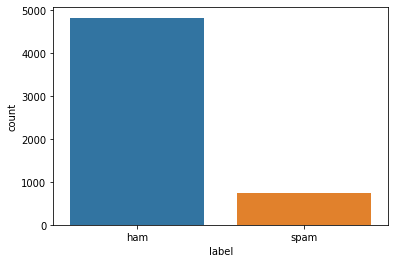

In [ ]:
sns.countplot(data['label'])
plt.savefig("dist")
plt.show()

Charts like this can be logged as well using the log_image function as shown below:

In [ ]:
neptune.log_image('target_dist', 'dist.png') # log the image

The chart is also saved in the logs dashboard

<img src='img2.png'/>

Let's do a little data processing. You'll convert the target/labels to numerical form.

In [ ]:
data['label'] = data['label'].map( {'spam': 1, 'ham': 0} )
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Next, seperate the spam and not-spam (ham) data so you can visualize them in wordclouds:

In [ ]:
data_ham  = data[data['label'] == 0].copy()
data_spam = data[data['label'] == 1].copy()

data_ham.to_csv("data_ham.csv")
data_spam.to_csv("data_spam.csv")

Log artifact such as dataset

In [ ]:
neptune.log_artifact("data_ham.csv")
neptune.log_artifact("data_spam.csv")

You can find the dataset in the artifact [page](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-2/artifacts) on Neptune. 

Next, let's make some wordcloud to better understand the dataset. Note that you can also log these charts on Neptune as well. 

In [ ]:
def show_wordcloud(df, title):
    text = ' '.join(df['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.savefig(f"{title}.png")
    plt.show()
    neptune.log_image(title, f'{title}.png') # log the image

### WordCloud: Ham messages

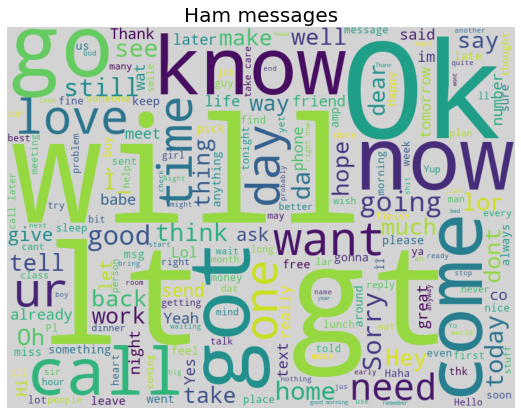

In [ ]:
show_wordcloud(data_ham, "Ham messages")

### WordCloud: Spam messages

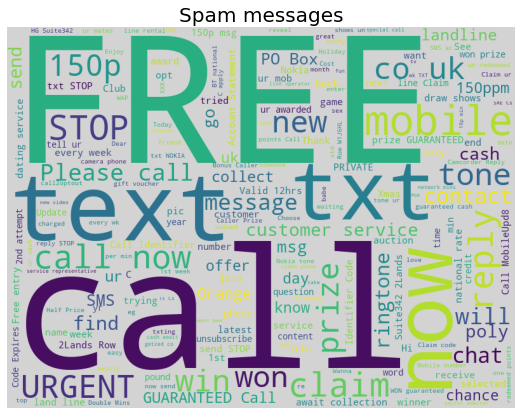

In [ ]:
show_wordcloud(data_spam, "Spam messages")

[Neptune link](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-2/logs) to the images. 

Next, you'll split the dataset into train and test set. 

In [ ]:
from sklearn.model_selection import train_test_split

X = data['text'].values
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##Save in properties
neptune.set_property('test_split_percent', 0.20)
neptune.set_property('data_split_random_state', 42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

### FEATURE ENGINEERING AND PROCESSING

Since the dataset is made up of text data, you will perform some text pre-processing to turn text into integers using the [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) and [pad_sequence](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) helper function in Keras. 

In [ ]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)

# integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

vocab_size = len(t.word_index) + 1

print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [ ]:
# pad documents to a max length of 4 words
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


Now that the data has been procesed and converted to integers. You are ready to start model training. Before you proceed, you'll create a new experiment for tracking model training. This experiment will be initialized with some training parameters, and will aid efficient model/experiment comparison in your future trainings.

In [ ]:
# parameters
PARAMS = {'vocab_size':vocab_size,
          'max_length': max_length,
          'epochs': 100,
          'batch_size': 64,
          'input_size': 24,
          'metric': 'accuracy',
          'loss': 'binary_crossentropy',
          'optimizer': 'rmsprop',
          'dropout': 0.5}

#create first model experiment 
neptune.create_experiment(name='training_model_exp1', params=PARAMS)

NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4


Experiment(SPAM-4)

Notice that the PARAMS dictionary contains mostly model parameters like input size, epochs, metrics and so on. Now that you have initialized the parameters, in the next section, you'll create your model. 

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, PARAMS['input_size'], input_length=max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(PARAMS['dropout']))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer=PARAMS['optimizer'], loss=PARAMS['loss'], metrics=[PARAMS['metric']])

# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 24)             190920    
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               96500     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

The model is pretty simple, and uses an [embedding](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/#:~:text=2.-,Keras%20Embedding%20Layer,API%20also%20provided%20with%20Keras.) layer as the input because you're working with text inputs of large dimensions. The output layer is a sigmoid node, because this is a binary classification problem (Spam or Not-Spam). 

In the next section, you'll start model training as you normally would when training a keras model, with just one exception in the callbacks section. 

In [ ]:
# fit the model
model.fit(x=padded_train, 
          y=y_train, 
          epochs=PARAMS['epochs'],
          batch_size=PARAMS['batch_size'],
          validation_data=(padded_test, y_test), verbose=1,
          callbacks=[NeptuneMonitor()]
          )

Epoch 1/100
70/70 [==============================] - 2s 23ms/step - loss: 0.2279 - accuracy: 0.9107 - val_loss: 0.1000 - val_accuracy: 0.9794
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.0707 - val_accuracy: 0.9848
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0858 - val_accuracy: 0.9848
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.1557 - val_accuracy: 0.9812
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 3.8729e-04 - accuracy: 0.9998 - val_loss: 0.1967 - val_accuracy: 0.9812
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 1.1962e-06 - accuracy: 1.0000 - val_loss: 0.2064 - val_accuracy: 0.9839
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 4.2790e-08 - accuracy: 1.0000 - val_loss: 0.2506 - val_accuracy: 0.9821


Notice that we pass the ``NeptuneMonitor()`` to the callbacks parameter of the ``model.fit`` methode? This is the one line integration of Neptune client with keras. This integration code will send all training metrics and logs like epoch loss, epoch accuracy, batch loss and batch accuracy and so on, in real time, and this can be monitored in the dashboard of your [experiment](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4/charts)


Click on [charts](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4/charts) to see live training logs

Click on [logs](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4/logs) to download training logs

<img src='img3.png' />


Isn't it amazing how with just a single line of code you and your team can get to log and monitor metrics in real time? It sure is! Now you can start long running model training and have a Neptune effectively monitor and log all metrics for you, and with just the dashboard link, you can check your experiments on the go. 


## EXTRA SECTION

In this extra section, You'll:
- Test your model
- Plot and save a confusion matrix for your model
- Make and save the prediction with your model as CSV
- Save your model as an artifact

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(padded_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

neptune.log_metric('Test Accuracy', accuracy)
neptune.log_metric('Test Loss', loss)

Accuracy: 98.385650


In [ ]:
preds = (model.predict(padded_test) > 0.5).astype("int32")
pd.Series(preds.flatten()).to_csv("test_predictions.csv", index=False)

neptune.log_artifact("test_predictions.csv") #save predictions

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("cf.png")
    neptune.log_image("confusion_matrix", "cf.png")

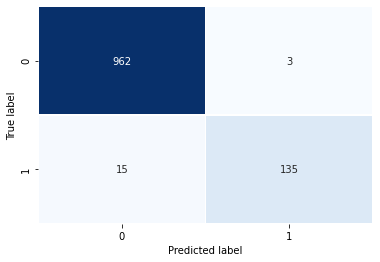

In [ ]:
plot_confusion_matrix(y_test, preds)

In [ ]:
model.save("spam_model_exp1")

#save model as an artifact
neptune.log_artifact("spam_model_exp1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: spam_model_exp1/assets


You can view saved model in the [artifacts](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4/charts) page. 

See the entire project on Neptune [LINK](https://ui.neptune.ai/risingodegua/spam-classifier/experiments?viewId=standard-view) 

|source code| |[open in colab](https://colab.research.google.com/drive/1YL9CTs9OWwi1jvFf9TZNYG7-vLk6jZsG?usp=sharing)|



Other integrations you may like
------------------------------------------

List of similar integrations
